In [1]:
import matplotlib.pyplot as plt
from src.pvsys import ShadedArray

In [2]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [
            CB91_Blue,
            CB91_Amber,
            CB91_Green,
            CB91_Violet,
            CB91_Pink,
            CB91_Purple,
            ]
              
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
plt.rc("text", usetex=True)
plt.rc("font", family="serif")

In [3]:
IRRADIANCES = [900, 900, 700, 400, 400]
CELL_TEMPS = [45, 25, 35, 45, 25]
TEMPERATURES = [ShadedArray.ambient_temp_from_cell(g, ct) for g, ct in zip(IRRADIANCES, CELL_TEMPS)]

pvsyss = ShadedArray.get_default_array()

In [4]:
curves = []
powers = []
mpps = []

for g, t in zip(IRRADIANCES, TEMPERATURES):
    pvsyss.simulate(
        duty_cycle=0.0,
        irradiance=[g, ] * 4,
        ambient_temperature=[t, ] * 4,
    )
    curve = pvsyss.get_shaded_iv_curve(curve_points=1000)
    curves.append(curve)
    powers.append(pvsyss.power(curve.voltage, curve.current))
    mpps.append(pvsyss.mpp_from_curve(curve))

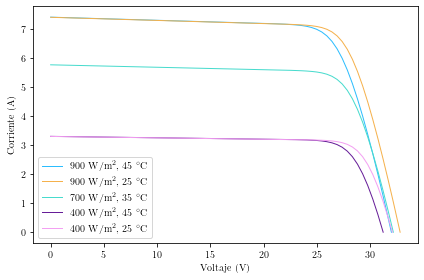

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Voltaje (V)")
ax.set_ylabel("Corriente (A)")

for curve, mpp, g, t, color in zip(curves, mpps, IRRADIANCES, CELL_TEMPS, color_list):
    ax.plot(curve.voltage, curve.current, linewidth=1.0, label=f'{g} $\mathrm{{W/m^2}}$, {t:0.0f} $^\circ \mathrm{{C}}$', color=color)
    # ax.plot(mpp.voltage, mpp.current, 'o', markersize=4, color=color)

ax.legend(loc='lower left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.savefig(r'output/ch2_multiple_iv_curves.pdf', bbox_inches='tight')

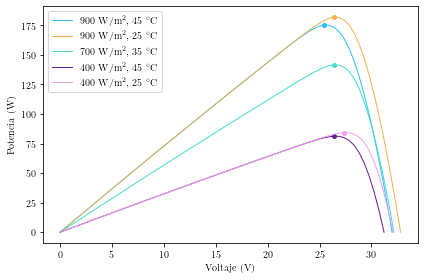

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Voltaje (V)")
ax.set_ylabel("Potencia (W)")

for curve, mpp, g, t, color in zip(curves, mpps, IRRADIANCES, CELL_TEMPS, color_list):
    power = pvsyss.power(curve.voltage, curve.current)
    ax.plot(curve.voltage, power, linewidth=1.0, label=f'{g} $\mathrm{{W/m^2}}$, {t:0.0f} $^\circ \mathrm{{C}}$', color=color)
    ax.plot(mpp.voltage, mpp.current * mpp.voltage, 'o', markersize=4, color=color)

ax.legend(loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.savefig(r'output/ch2_multiple_pv_curves.pdf', bbox_inches='tight')